# Часть 1

Поставить python и все библиотеки

In [144]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score

import numpy as np

In [145]:
iris = load_iris()

X = iris.data[:, :2]
y = iris.target

print round(np.mean(cross_val_score(RandomForestClassifier(random_state=42), X, y, cv=3)), 4)

0.7132


#### Вопрос 1. Что выведет этот код?
**Ответ №1:** 0.7132

# Часть 2


In [146]:
iris = load_iris()

X = iris.data[:, :2]
y = iris.target

In [147]:
# print iris.DESCR

#### Вопрос 2. Каков минимальный радиус круга, содержащего все точки из $X$? Ответ округлите до 4 знака после запятой.

**Идея решения:** 
1. Создать функцию f(p, s), которая считает расстояние между точками p, s для всех p и для случайно выбранной в начале s, и затем она выбирает минимальное из полученных расстояний.
2. Минимизировать f

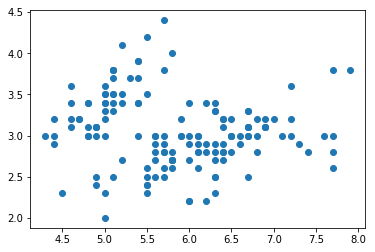

In [148]:
import matplotlib.pyplot as plt
import math
%matplotlib inline

plt.plot(np.array(X[:,0]),np.array(X[:,1]), 'o')
plt.show()

In [149]:
X[0]

array([ 5.1,  3.5])

In [150]:
def f(s):
    minimum = 0.0
    for p in X:
        minimum = max(math.hypot(p[0]-s[0], p[1]-s[1]), minimum)
    return minimum

In [151]:
print f([6,3])

2.06155281281


In [152]:
from scipy.optimize import basinhopping

In [153]:
minimizer_kwargs = {"method": "Nelder-Mead"}

ret = basinhopping(f, [6,3], minimizer_kwargs=minimizer_kwargs)

In [154]:
print ret.x, ret.fun

[ 6.15522173  3.1514965 ] 1.86139947406


**Ответ №2:** 1.8614

https://ru.wikipedia.org/wiki/Пауль_(осьминог)

Этот осьминог предсказывал результаты футбольных матчей на  ЧЕ-2008 и ЧМ-2010. Нужно проанализировать его предсказания, считая, что футбольный матч обязательно заканчивается победой одной из команд, а осьминог возможно выбирал равновероятно наугад.

#### Вопрос 3. Какова вероятность получить именно те предсказания, что дал осьминог, выбирая наугад? Ответ округлите до 5 знака после запятой.

In [155]:
print '%.6f'%(1.0/2**14)

0.000061


**Ответ №3:** 0.00006

#### Вопрос 4. Какова вероятность угадать не меньшее число раз, чем осьминог Пауль, выбирая наугад? Ответ округлите до 5 знака после запятой.

In [156]:
print '%.10f'%( (1.0+14+13*7) / (2**14) )

0.0064697266


**Ответ №4:** 0.00647

# Часть 3


#### Вопрос 5. У вас есть набор зависимости $y$ от одной переменной $x$, причём вы знаете, что эта зависимость линейная ($y=ax + b$). Вам нужно восстановить эту зависимость, решив оптимизационную задачу $\min_{a, b} \sum_{i=1}^n (ax_i + b - y_i)^2$.

#### Проблема в том, что выборка очень большая, поэтому её нельзя полностью загрузить в память. Ответом на вопрос является строка в питоновском формате '{}_{}'.format(round(a, 5), round(b, 5)), например, '0.00001_0.00002'.

In [157]:
def generator():
    rand_gen = np.random.RandomState(42)
    for i in xrange(100000):
        arr_of_x = 10 * rand_gen.uniform(size=10000)
        arr_of_noise = 40 * rand_gen.normal(size=10000)
        for x, noise in zip(arr_of_x, arr_of_noise):
            yield x, 3.14 * x + 8.3 + noise

In [158]:
from scipy.optimize import basinhopping

In [ ]:
dots = []
for i in generator:
    dots.append(i)
print dots[0]

In [160]:
def solver(seq):
    dots = []
    for i in seq:
        dots.append(i)
    print dots[0]
    return a, b

In [ ]:
%%time
a, b = solver(generator())
print '{}_{}'.format(round(a, 5), round(b, 5))

#### Вам дается две выборки с пользовательскими сессиями - id-шниками просмотренных и id-шниками купленных товаров. Одна выборка будет использоваться для обучения (оценки популярностей товаров), а другая - для теста.

#### В файлах записаны сессии по одной в каждой строке. Формат сессии: id просмотренных товаров через "," затем идёт ";" после чего следуют id купленных товаров (если такие имеются), разделённые запятой. Например, "1,2,3,4;" или "1,2,3,4;5,6". Гарантируется, что среди id купленных товаров все различные.

#### Вопросы 6-7. Будем считать, что цена товара равна его id % 100 + 1. Найдите разницу денежного recall для сортировки по вероятности покупки (методы уже реализованы) без умножения на цену и с умножением на цену для train и для test. Ответ округлите до 5 знака после запятой.

#### У вас есть код для подсчёта обычного recall, вам нужно переписать его, взвесив объекты их ценой. Знаменатель будет равен сумме цен купленных товаров.



In [ ]:
from collections import Counter
from collections import OrderedDict
import numpy as np
import pandas
import heapq

In [ ]:
visit_popularity = Counter()
purchase_popularity = Counter()

with open('train.txt', 'r') as f:
    for line in f.xreadlines():
        visits, purchases = line.strip().split(';')
        for visit in visits.split(','):
            visit_popularity[visit] += 1
        if purchases != '':
            for purchase in purchases.split(','):
                purchase_popularity[purchase] += 1

                
def get_item_price(item_id):
    return int(item_id) % 100 + 1

In [ ]:
def recommend_by_purchase(items, max_count):
    return heapq.nlargest(max_count, OrderedDict.fromkeys(items), key=lambda x: purchase_popularity.get(x, 0))

def recommend_by_purchase_price_aware(items, max_count):
    # Напишите здесь свой код

In [ ]:
# Допишите код в функции, чтобы считался recall, взвешенный ценами

def calculate_metrics(recommend, max_count, sessions_file):
    with open(sessions_file, 'r') as f:
        avg_recall = np.zeros(max_count)
        sessions_count = 0
        for line in f.xreadlines():
            visits, purchases = line.strip().split(';')
            if purchases != '':
                visits = visits.split(',')
                purchases = set(purchases.split(','))

                rec = recommend(visits, max_count)
                rec_hits = np.array([(x in purchases) for x in rec])
                hits = np.zeros(max_count)
                hits[:len(rec_hits)] = rec_hits
                
                sessions_count += 1
                avg_recall +=  np.cumsum(hits) / len(purchases)

    return pandas.DataFrame({
            'k': np.arange(max_count) + 1,
            'avg_recall@k': avg_recall / sessions_count,
    }).set_index('k')

In [ ]:
print round((
    calculate_metrics(recommend_by_purchase_price_aware, 3, 'train.txt') 
    - calculate_metrics(recommend_by_purchase, 3, 'train.txt')
)['avg_recall@k'][3], 5)

In [ ]:
print round((
    calculate_metrics(recommend_by_purchase_price_aware, 3, 'test.txt') 
    - calculate_metrics(recommend_by_purchase, 3, 'test.txt')
)['avg_recall@k'][3], 5)